<a href="https://colab.research.google.com/github/tiffanyndanu/Mchezopesa/blob/main/Mchezopesa_IP_WK_6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. DEFINING THE QUESTION.**

### **a)The Data Analytic Question**





I've been assigned with completing the work below as a football analyst for Mchezopesa Ltd.

Based on who is at home and who is away, as well as whether or not the game is friendly, a forecast result of a game between team 1 and team 2(include rank in your training)










 ### **b)Metric for Success**



 Approach 1: Polynomial approach
Be able to Predict how many goals the home team scores. Be able to Predict how many goals the away team scores.

 Approach 2: Logistic approach
Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw.

 For our analysis to be considered successful, we must be able to:

1.Perform explorative data analysis.

2.Create a prediction model with high accuracy.

3.Predict how many goals the home team and the away team scores.

4.Predict whether from the home team's perspective, the game is a Win, Lose or Draw.

















### **c)Understanding the context** 

FIFA produced the inaugural ranking of its men's member associations in December 1992 to offer a framework for comparing the relative strengths of these teams.

 Historical rankings records, such as those found on FIFA.com, reflect the method of calculation in use at the time, as the new technique has not been applied retroactively to rankings prior to July 2006. Since the rankings began, FIFA's membership has grown from 167 to 211, with 210 members currently included in the rankings.

 FIFA uses the rankings to rate the progress and existing capabilities of its member nations' national football teams, claiming that they provide "a valid metric for comparing national A-teams."They are used to seed tournaments as part of the calculation or as the complete grounds.

 The rankings are also used to choose the winners of two annual awards given to national teams based on their rankings performance.

One of the factors for player work permits used by the (English) Football Association is the average of the previous 24 months' rankings.

###**d)Experimental Design**




> These are the steps to be followed during the analysis:


1.Defining the Question

2.Data preparation

3.Data Cleaning

4.Merging the Dataframes

5.Performing EDA

6.Prediction Models

7.Checking accuracy for our models

8.Challenging the solution and conclusion



###**e)Data Relevance**

We may conclude that the dataset is useful because, in order to forecast how many goals a home or away team will score in a match, you'll need to know the teams' rankings, the tournament in which they are competing, and their names, all of which are present columns in our dataset.

# **2. DATA PREPARATION**

# 2.1 Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error , accuracy_score , confusion_matrix
from sklearn.model_selection import GridSearchCV , KFold , StratifiedKFold , cross_val_score
import warnings 
warnings.filterwarnings('ignore')

# 2.2 Loading the Datasets

In [3]:
# Loading the ranking dataset and previewing it

Ranking = pd.read_csv('/content/fifa_ranking.csv')
Ranking


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [4]:
# Loading the results dataset and previewing it

Results = pd.read_csv('/content/results.csv')
Results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


# 2.3 Checking the Datasets

In [5]:
# Checking the shape of both datsets

print(Ranking.shape)
print(Results.shape)

#The ranking datset has 57,793 rows and 16 columns
#The results dataset has 40,839 rows and 9 columns

(57793, 16)
(40839, 9)


In [6]:
# Getting information about the Ranking dataset

Ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [7]:
# Getting information about the Results dataset

Results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [8]:
# Summary statistics for the Ranking dataset

Ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [9]:
# Summary statistics for the Results dataset

Results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# **3. DATA CLEANING**

In [10]:
# Checking for missing values in the ranking dataset

Ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [11]:
# Checking for missing values in the results dataset

Results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [12]:
# Checking for duplicates in the ranking dataset

Ranking.duplicated().sum()

37

In [13]:
# Dropping duplicates in the Ranking dataset

Ranking.drop_duplicates(inplace=True)
Ranking.duplicated().sum()

0

In [14]:
# Checking for duplicates in the results dataset

Results.duplicated().sum()

0

In [15]:
# Looking at the columns in the Ranking dataset

Ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [16]:
 # Looking at the columns in the Results dataset.

Results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

# **4. MERGING THE DATASETS**

In [17]:
Merged = Results.merge(Ranking, left_on = ['date', 'home_team'],
                        right_on = ['rank_date', 'country_full'], how = 'inner')
Merged

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,...,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,2018-06-07,England,Costa Rica,2,0,Friendly,Leeds,England,False,12,...,476.42,476.42,593.51,296.75,580.49,174.15,517.60,103.52,UEFA,2018-06-07
953,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Montevideo,Uruguay,False,14,...,486.28,486.28,487.69,243.84,561.47,168.44,599.26,119.85,CONMEBOL,2018-06-07
954,2018-06-07,Portugal,Algeria,3,0,Friendly,Lisbon,Portugal,False,4,...,646.92,646.92,691.82,345.91,517.77,155.33,627.63,125.53,UEFA,2018-06-07
955,2018-06-07,Iceland,Ghana,2,2,Friendly,Reykjavík,Iceland,False,22,...,438.64,438.64,564.25,282.13,302.02,90.61,483.19,96.64,UEFA,2018-06-07


In [18]:
# Columns in the merged dataset

Merged.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank', 'country_full',
       'country_abrv', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date'],
      dtype='object')

In [19]:
Merged.date = pd.to_datetime(Merged.date)
Merged['year'] = Merged.date.dt.year
Merged['month'] = Merged.date.dt.month
Merged

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,...,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,...,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,...,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,...,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,...,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,1993,8
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,...,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,2018-06-07,England,Costa Rica,2,0,Friendly,Leeds,England,False,12,...,593.51,296.75,580.49,174.15,517.60,103.52,UEFA,2018-06-07,2018,6
953,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Montevideo,Uruguay,False,14,...,487.69,243.84,561.47,168.44,599.26,119.85,CONMEBOL,2018-06-07,2018,6
954,2018-06-07,Portugal,Algeria,3,0,Friendly,Lisbon,Portugal,False,4,...,691.82,345.91,517.77,155.33,627.63,125.53,UEFA,2018-06-07,2018,6
955,2018-06-07,Iceland,Ghana,2,2,Friendly,Reykjavík,Iceland,False,22,...,564.25,282.13,302.02,90.61,483.19,96.64,UEFA,2018-06-07,2018,6


In [20]:
# Dropping irrelevant columns in the merged dataset

Merged1 = Merged.drop(columns = ['city', 'date',
                       'country_full',
       'country_abrv', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       ])
Merged1.head()

,home_team,away_team,home_score,away_score,tournament,country,neutral,rank,rank_date,year,month
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,59,1993-08-08,1993,8
1,Brazil,Mexico,1,1,Friendly,Brazil,False,8,1993-08-08,1993,8
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,35,1993-08-08,1993,8
3,Guinea,Sierra Leone,1,0,Friendly,Guinea,False,65,1993-08-08,1993,8
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False,67,1993-08-08,1993,8


In [21]:
# Renaming the column rank to home rank

Merged4 = Merged1.rename(columns = {'rank' : 'home_rank'})

In [22]:
# Merging based on away team 

Merged2 = Results.merge(Ranking, left_on = ['date', 'away_team'],
                        right_on = ['rank_date', 'country_full'], how = 'inner')
Merged2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,...,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,22,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,14,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,94,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,5,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Montevideo,Uruguay,False,95,...,66.85,66.85,305.61,152.80,311.74,93.52,203.71,40.74,AFC,2018-06-07
929,2018-06-07,Portugal,Algeria,3,0,Friendly,Lisbon,Portugal,False,66,...,163.41,163.41,234.78,117.39,304.68,91.40,508.13,101.63,CAF,2018-06-07
930,2018-06-07,South Korea,Bolivia,0,0,Friendly,Innsbruck,Austria,True,59,...,291.14,291.14,313.86,156.93,222.28,66.68,106.60,21.32,CONMEBOL,2018-06-07
931,2018-06-07,Iceland,Ghana,2,2,Friendly,Reykjavík,Iceland,False,47,...,261.21,261.21,339.92,169.96,332.99,99.90,463.15,92.63,CAF,2018-06-07


In [23]:
Merged2.date = pd.to_datetime(Merged2.date)
Merged2['year'] = Merged2.date.dt.year
Merged2['month'] = Merged2.date.dt.month
Merged2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,...,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,22,...,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,14,...,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,1993-08-08,1993,8
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,94,...,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,86,...,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,1993,8
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,5,...,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Montevideo,Uruguay,False,95,...,305.61,152.80,311.74,93.52,203.71,40.74,AFC,2018-06-07,2018,6
929,2018-06-07,Portugal,Algeria,3,0,Friendly,Lisbon,Portugal,False,66,...,234.78,117.39,304.68,91.40,508.13,101.63,CAF,2018-06-07,2018,6
930,2018-06-07,South Korea,Bolivia,0,0,Friendly,Innsbruck,Austria,True,59,...,313.86,156.93,222.28,66.68,106.60,21.32,CONMEBOL,2018-06-07,2018,6
931,2018-06-07,Iceland,Ghana,2,2,Friendly,Reykjavík,Iceland,False,47,...,339.92,169.96,332.99,99.90,463.15,92.63,CAF,2018-06-07,2018,6


In [24]:
# Dropping irrelevant columns in the merged dataset

Merged3 = Merged2.drop(columns = ['city', 'date',
                       'country_full',
       'country_abrv', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       ])
Merged3.head()

,home_team,away_team,home_score,away_score,tournament,country,neutral,rank,rank_date,year,month
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,22,1993-08-08,1993,8
1,Brazil,Mexico,1,1,Friendly,Brazil,False,14,1993-08-08,1993,8
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,94,1993-08-08,1993,8
3,Guinea,Sierra Leone,1,0,Friendly,Guinea,False,86,1993-08-08,1993,8
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False,5,1993-08-08,1993,8


In [25]:
# Renaming the rank column to away rank

Merged5=Merged3.rename(columns = {'rank' : 'away_rank'})

In [26]:
# Merging the two datasets to get a general dataset with both ranks

Finalmerge = pd.merge(Merged4, Merged5, how = 'inner', left_on = ['year','month','away_team'], right_on = ['year','month','away_team'])
Finalmerge.head()

,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,home_rank,rank_date_x,year,month,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y,away_rank,rank_date_y
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,59,1993-08-08,1993,8,Bolivia,3,1,FIFA World Cup qualification,Bolivia,False,22,1993-08-08
1,Brazil,Mexico,1,1,Friendly,Brazil,False,8,1993-08-08,1993,8,Brazil,1,1,Friendly,Brazil,False,14,1993-08-08
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,35,1993-08-08,1993,8,Ecuador,5,0,FIFA World Cup qualification,Ecuador,False,94,1993-08-08
3,Guinea,Sierra Leone,1,0,Friendly,Guinea,False,65,1993-08-08,1993,8,Guinea,1,0,Friendly,Guinea,False,86,1993-08-08
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False,67,1993-08-08,1993,8,Paraguay,1,3,FIFA World Cup qualification,Paraguay,False,5,1993-08-08


In [27]:
# Previewing columns in the final dataset

Finalmerge.columns

Index(['home_team_x', 'away_team', 'home_score_x', 'away_score_x',
       'tournament_x', 'country_x', 'neutral_x', 'home_rank', 'rank_date_x',
       'year', 'month', 'home_team_y', 'home_score_y', 'away_score_y',
       'tournament_y', 'country_y', 'neutral_y', 'away_rank', 'rank_date_y'],
      dtype='object')

In [28]:
# Dropping repeated columns

Finalmerge1 = Finalmerge.drop(columns = ['home_team_x','tournament_x','country_x','neutral_x','home_score_x','away_score_x','rank_date_x'])
Finalmerge1

,away_team,home_rank,year,month,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y,away_rank,rank_date_y
0,Uruguay,59,1993,8,Bolivia,3,1,FIFA World Cup qualification,Bolivia,False,22,1993-08-08
1,Mexico,8,1993,8,Brazil,1,1,Friendly,Brazil,False,14,1993-08-08
2,Venezuela,35,1993,8,Ecuador,5,0,FIFA World Cup qualification,Ecuador,False,94,1993-08-08
3,Sierra Leone,65,1993,8,Guinea,1,0,Friendly,Guinea,False,86,1993-08-08
4,Argentina,67,1993,8,Paraguay,1,3,FIFA World Cup qualification,Paraguay,False,5,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...
868,Costa Rica,12,2018,6,England,2,0,Friendly,England,False,23,2018-06-07
869,Uzbekistan,14,2018,6,Uruguay,3,0,Friendly,Uruguay,False,95,2018-06-07
870,Algeria,4,2018,6,Portugal,3,0,Friendly,Portugal,False,66,2018-06-07
871,Ghana,22,2018,6,Iceland,2,2,Friendly,Iceland,False,47,2018-06-07


In [29]:
# Renaming the columns
Finalmerge1.columns = ['away_team', 'home_rank', 'year', 'month', 'home_team',
       'home_score', 'away_score', 'tournament', 'country',
       'neutral', 'away_rank', 'rank_date']
Finalmerge1       

,away_team,home_rank,year,month,home_team,home_score,away_score,tournament,country,neutral,away_rank,rank_date
0,Uruguay,59,1993,8,Bolivia,3,1,FIFA World Cup qualification,Bolivia,False,22,1993-08-08
1,Mexico,8,1993,8,Brazil,1,1,Friendly,Brazil,False,14,1993-08-08
2,Venezuela,35,1993,8,Ecuador,5,0,FIFA World Cup qualification,Ecuador,False,94,1993-08-08
3,Sierra Leone,65,1993,8,Guinea,1,0,Friendly,Guinea,False,86,1993-08-08
4,Argentina,67,1993,8,Paraguay,1,3,FIFA World Cup qualification,Paraguay,False,5,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...
868,Costa Rica,12,2018,6,England,2,0,Friendly,England,False,23,2018-06-07
869,Uzbekistan,14,2018,6,Uruguay,3,0,Friendly,Uruguay,False,95,2018-06-07
870,Algeria,4,2018,6,Portugal,3,0,Friendly,Portugal,False,66,2018-06-07
871,Ghana,22,2018,6,Iceland,2,2,Friendly,Iceland,False,47,2018-06-07


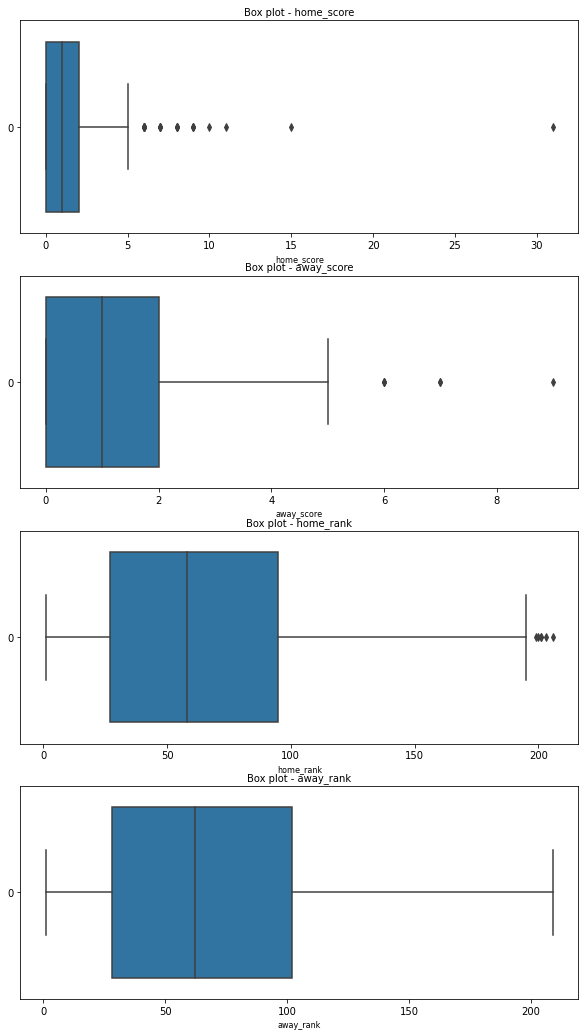

In [30]:
# Checking for outliers using only numerical parameters

col_names = ['home_score', 'away_score', 'home_rank', 'away_rank']

fig, ax = plt.subplots(len(col_names), figsize= (10,18))

for i, col_val in enumerate(col_names):
  sns.boxplot(data = Finalmerge1[col_val], ax= ax[i], orient="h")
  Finalmerge1[col_val].value_counts()
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()


In [31]:
#Dealing with the outliers 

Q3 = Finalmerge1[col_names].quantile(0.75)
Q1 = Finalmerge1[col_names].quantile(0.25)
IQR = Q3 - Q1

# Determine the outliers
outliers = Finalmerge1[col_names][((Finalmerge1[col_names] < (Q1 - 1.5 * IQR))
 |(Finalmerge1[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]
j = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(Finalmerge1))*100

# The total number of outliers
print(f"The total number of outliers translates to {percentage_of_outliers}% of the data.")


The total number of outliers translates to 3.6655211912943875% of the data.


Outliers will not be dropped because the goals scored either by the home team or away team are actual representations of the goals scored therefore they are necessary in our analysis.

# **5. Explaratory Data Analysis**

# Univariate Analysis

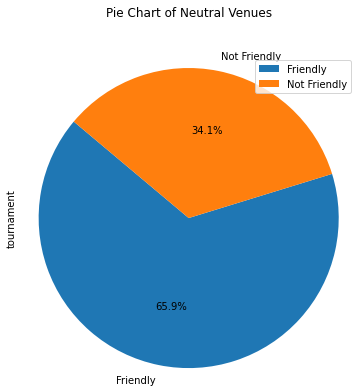

In [32]:
# Pie chart

Finalmerge1.loc[Finalmerge1.tournament != 'Friendly', 'tournament'] = 'Not Friendly'
Finalmerge1['tournament'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Pie Chart of Neutral Venues', y=1.1)
plt.show()

In [33]:
# Mean 
home_mean = Finalmerge1['home_score'].mean()
print("The average home score is: ", home_mean)
print('\n')

away_mean = Finalmerge1['away_score'].mean()
print("The average away score is: ", away_mean)
print('\n')

The average home score is:  1.6334478808705613


The average away score is:  1.002290950744559




In [34]:
# Mode 
home_mode = Finalmerge1['home_score'].mode()
print("The mode of the home score is: ", home_mode)
print('\n')

away_mode = Finalmerge1['away_score'].mode()
print("The mode of the away score is: ", away_mode)
print('\n')


The mode of the home score is:  0    1
dtype: int64


The mode of the away score is:  0    0
dtype: int64




In [35]:
# Median
home_median = Finalmerge1['home_score'].median()
print("The median of the home score is: ", home_median)
print('\n')

away_median = Finalmerge1['away_score'].median()
print("The median of the away score is: ", away_median)
print('\n')

The median of the home score is:  1.0


The median of the away score is:  1.0




# Bivariate Analysis

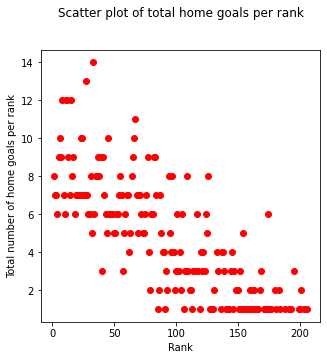

In [36]:
# Scatter plot between the rank and the home goals scored

home_rank=Finalmerge1.groupby('home_rank')['home_score'].count().reset_index(name='total number of home goals per rank')
plt.figure(figsize=(5,5))
plt.scatter(home_rank['home_rank'] , home_rank["total number of home goals per rank"], color='red')
plt.xlabel("Rank")
plt.ylabel("Total number of home goals per rank")
plt.title("Scatter plot of total home goals per rank", y=1.1)
plt.show()

This scatter plot suggests that as the rank of the countries increases, the total number of home goals reduces. It makes sense since the highest ranked countries score the most home goals and the least ranked countries score the least goals.

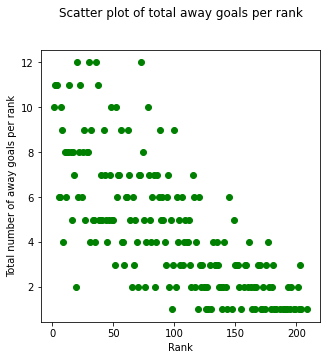

In [37]:
# Scatter plot betwwen the rank and the number of away goals scored
away_rank=Finalmerge1.groupby('away_rank')['away_score'].count().reset_index(name='total number of away goals per rank')
plt.figure(figsize=(5,5))
plt.scatter(away_rank['away_rank'] , away_rank["total number of away goals per rank"], color = 'green')
plt.xlabel("Rank")
plt.ylabel("Total number of away goals per rank")
plt.title("Scatter plot of total away goals per rank", y=1.1)
plt.show()

This scatter plot suggests that the higher the rank, the less away goals scored by the countries.




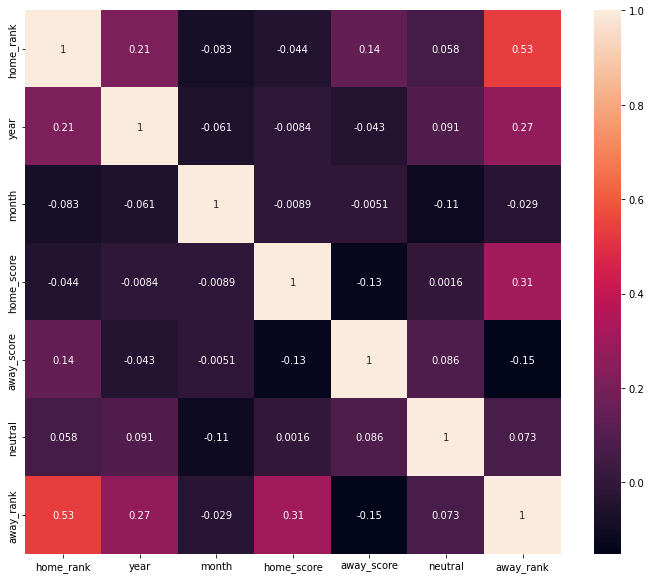

In [38]:
# Visualization using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(Finalmerge1.corr(), annot=True)
plt.show()

# **6. Implementing the Solution**

# Feature Engineering

In [39]:
# Generating a status column
# Creating a list to display the conditions of the match
# from the home team's perspective 
conditions = [
    (Finalmerge1['home_score'] > Finalmerge1['away_score']),
    (Finalmerge1['home_score'] < Finalmerge1['away_score']),
    (Finalmerge1['home_score'] == Finalmerge1['away_score'])
    ]

# Create a list of the status we want to assign for each condition
status = ['Win', 'Lose', 'Draw']

# Create a new column and use np.select to assign values to it using our lists as arguments
Finalmerge1['status'] = np.select(conditions, status)


In [40]:
# Genearting a column that tells us whether the tournament was a friendly or not
def tournament(t):
    if t == 'Friendly':
        return 'Friendly'
    else:
        return 'Not Friendly'
      
Finalmerge1['tournament_type'] = Finalmerge1.tournament.apply(lambda i: tournament(i))

In [41]:
# Previewing the dataset

Finalmerge1

,away_team,home_rank,year,month,home_team,home_score,away_score,tournament,country,neutral,away_rank,rank_date,status,tournament_type
0,Uruguay,59,1993,8,Bolivia,3,1,Not Friendly,Bolivia,False,22,1993-08-08,Win,Not Friendly
1,Mexico,8,1993,8,Brazil,1,1,Friendly,Brazil,False,14,1993-08-08,Draw,Friendly
2,Venezuela,35,1993,8,Ecuador,5,0,Not Friendly,Ecuador,False,94,1993-08-08,Win,Not Friendly
3,Sierra Leone,65,1993,8,Guinea,1,0,Friendly,Guinea,False,86,1993-08-08,Win,Friendly
4,Argentina,67,1993,8,Paraguay,1,3,Not Friendly,Paraguay,False,5,1993-08-08,Lose,Not Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,Costa Rica,12,2018,6,England,2,0,Friendly,England,False,23,2018-06-07,Win,Friendly
869,Uzbekistan,14,2018,6,Uruguay,3,0,Friendly,Uruguay,False,95,2018-06-07,Win,Friendly
870,Algeria,4,2018,6,Portugal,3,0,Friendly,Portugal,False,66,2018-06-07,Win,Friendly
871,Ghana,22,2018,6,Iceland,2,2,Friendly,Iceland,False,47,2018-06-07,Draw,Friendly


# Multicollinearity Check

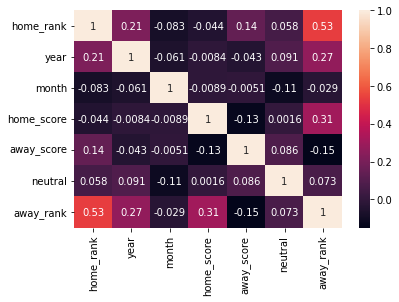

In [42]:
# Correlation 
correlation = Finalmerge1.corr()

# Visualizing the correlation using a heatmap
sns.heatmap(Finalmerge1.corr(), annot=True)
plt.show()

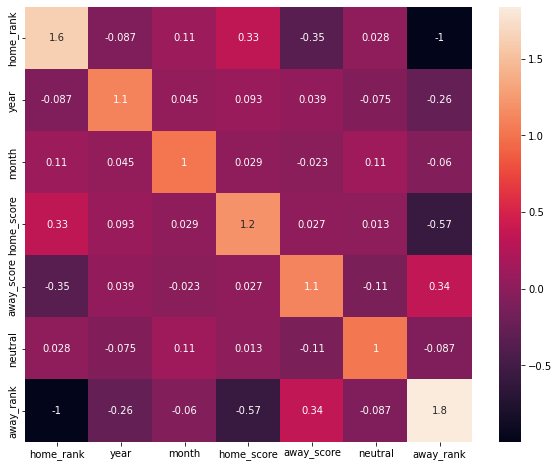

In [43]:
# Checking for collinearity using the VIF (Variation Inflation Factor)
vif = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# Visualize the VIF using a heatmap
plt.subplots(figsize =  (10,8))
sns.heatmap(vif, annot = True)
plt.show()

# Polynomial Regression

What to train given:

1.Rank of home team

2.Rank of away team

Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores

In [44]:
# Selecting columns we will use in our modelling

Fifaresults = Finalmerge1[["home_team","away_team","home_score","away_score","home_rank","away_rank","tournament_type","status"]]
Fifaresults.head()

,home_team,away_team,home_score,away_score,home_rank,away_rank,tournament_type,status
0,Bolivia,Uruguay,3,1,59,22,Not Friendly,Win
1,Brazil,Mexico,1,1,8,14,Friendly,Draw
2,Ecuador,Venezuela,5,0,35,94,Not Friendly,Win
3,Guinea,Sierra Leone,1,0,65,86,Friendly,Win
4,Paraguay,Argentina,1,3,67,5,Not Friendly,Lose


In [45]:
# Working on the 'tournament' column

tournament = LabelEncoder().fit(Fifaresults['tournament_type'].unique())
class_tournament = tournament.classes_
Fifaresults['tournament_type'] = tournament.transform(Fifaresults['tournament_type'].values)
Fifaresults.head()

,home_team,away_team,home_score,away_score,home_rank,away_rank,tournament_type,status
0,Bolivia,Uruguay,3,1,59,22,1,Win
1,Brazil,Mexico,1,1,8,14,0,Draw
2,Ecuador,Venezuela,5,0,35,94,1,Win
3,Guinea,Sierra Leone,1,0,65,86,0,Win
4,Paraguay,Argentina,1,3,67,5,1,Lose


# Predicting Home Score

In [75]:
# Locating the columns we will use

X = Fifaresults[['home_rank', 'away_rank', 'status']].values
Y = Fifaresults['home_score'].values


In [76]:
print(X.shape)
print(Y.shape)

(873, 3)
(873,)


In [78]:
#Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [79]:
# Fit Linear Regression model to the dataset
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [111]:
# Fit polynomial Regression to the dataset

poly_x = PolynomialFeatures(degree = 4)
X_poly = poly_x.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, Y)

LinearRegression()

In [112]:
# Predict using linear regression
lin_pred = regressor.predict([[59, 22, 2]])
print('Linear prediction: %d' %lin_pred)
print("Linear Prediction (accurate):", lin_pred)
# Predict using Polynomial Regression
poly_pred = poly_reg.predict(poly_x.fit_transform([[59, 22, 2]]))
print('Polynomial prediction: %d' %poly_pred)
print("Linear Prediction (accurate):", lin_pred)

Linear prediction: 1
Linear Prediction (accurate): [1.73873508]
Polynomial prediction: 3
Linear Prediction (accurate): [1.73873508]


In [82]:
# Working on the 'status' column
# 
Status = LabelEncoder().fit(Fifaresults['status'].unique())
class_outcome = Status.classes_
Fifaresults['status'] = Status.transform(Fifaresults['status'].values)
Fifaresults.tail()

,home_team,away_team,home_score,away_score,home_rank,away_rank,tournament_type,status
868,England,Costa Rica,2,0,12,23,0,2
869,Uruguay,Uzbekistan,3,0,14,95,0,2
870,Portugal,Algeria,3,0,4,66,0,2
871,Iceland,Ghana,2,2,22,47,0,0
872,India,New Zealand,1,2,97,120,1,1


In [115]:
# Predict using linear regression
lin_pred = regressor.predict([[97, 120, 1]])
print('Linear prediction: %d' %lin_pred)
print("Linear Prediction (accurate):", lin_pred)
# Predict using Polynomial Regression
poly_pred = poly_reg.predict(poly_x.fit_transform([[97, 120, 1]]))
print('Polynomial prediction: %d' %poly_pred)
print("Linear Prediction (accurate):", lin_pred)

Linear prediction: 1
Linear Prediction (accurate): [1.86056603]
Polynomial prediction: 2
Linear Prediction (accurate): [1.86056603]


In [84]:
# k-fold cross validation with the standard 5 folds

# 
folds = KFold(n_splits = 5)

In [120]:
# First assessing the accuracy of that model
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predict_home = regressor.predict(X_test)
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_predict_home)))

Root Mean Squared Error: 1.248303864812518


In [121]:
# We now create and assess 5 models based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1


Training model 1
Model 1 Root Mean Squared Error: 1.3246859622827003

Training model 2
Model 2 Root Mean Squared Error: 2.3823643079769448

Training model 3
Model 3 Root Mean Squared Error: 1.47831800991944

Training model 4
Model 4 Root Mean Squared Error: 1.0709808862801895

Training model 5
Model 5 Root Mean Squared Error: 1.544709736648639


As you can tell from running the code, the RMSE value for our second model is fairly larger than the RMSE we found initially, and that of the other models.

In [122]:
# Calculating the average RMSE value of the RMSE values created by the k-folds

np.mean(RMSES)

1.5602117806215827

As you can see, the average is fairly close to our initial value.

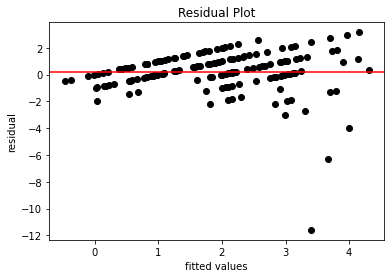

In [123]:
# Plotting the residuals 
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

In [125]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_train, residuals)

degree_of_freedom = len(X_train)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

829.0882681997725
the variances are homogeneous!


# Logistic Regression

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

We had done feature engingineering before to get the result column that displays whether match was win, lose or draw.

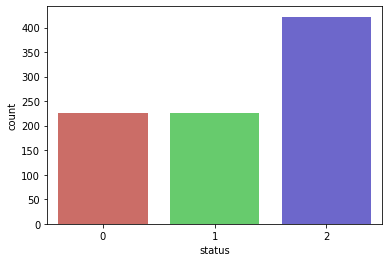

In [129]:
sns.countplot(x='status',data=Fifaresults, palette='hls')

In [131]:
# The status column will be the required variable

Status_prediction = Fifaresults.drop(columns = ['home_team', 'away_team', 'tournament_type', 'home_rank', 'away_rank'])
Status_prediction.head()

,home_score,away_score,status
0,3,1,2
1,1,1,0
2,5,0,2
3,1,0,2
4,1,3,1


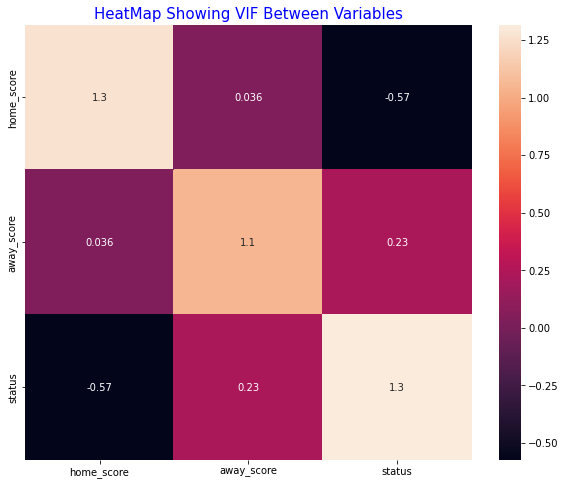

In [133]:
# Checking for multicollinearity between the variables

vif = pd.DataFrame(np.linalg.inv(Status_prediction.corr().values), index = Status_prediction.corr().index,
                      columns = Status_prediction.corr().columns)

plt.figure(figsize = (10,8))
sns.heatmap(vif, annot = True)
plt.title('HeatMap Showing VIF Between Variables', color='Blue', size=15);

In [136]:
# Setting up our train and test sets

# 
X_status = Status_prediction.drop('status', axis = 1)
Y_status = Status_prediction['status']
print(X_status.shape)
print(Y_status.shape)

(873, 2)
(873,)


In [138]:
# Splitting our data

X_status_train, X_status_test, y_status_train, y_status_test = train_test_split(X_status, Y_status,
                                                                    test_size = 0.2,
                                                                    random_state = 0)
LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X_status_train, y_status_train)

LogisticRegression(solver='liblinear')

In [139]:
# Cross Validating the Model

score = cross_val_score(LogisticRegression(solver='liblinear', multi_class = 'auto'), X_status, Y_status, cv = 3)
score

array([0.99312715, 0.98969072, 1.        ])

In [140]:
# Assessing the accuracy of our model
# ---
#
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.99 (+/- 0.01)


The accuracy test was pased.